<a href="https://colab.research.google.com/github/Behnam-H/qiskit-learning/blob/main/S1_EP6%20Bernstein%20Vazirani%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit pylatexenc

In [4]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [57]:
secretnumber = '101001'

In [58]:
#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

# #circuit.x(6)
# #circuit.h(6)
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

# # circuit.cx(5,6)
# # circuit.cx(3,6)
# # circuit.cx(0,6)
for ii, yesno in enumerate(reversed(secretnumber)):
  if yesno == '1':
    circuit.cx(ii, len(secretnumber))

circuit.barrier()

# #circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

# #circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

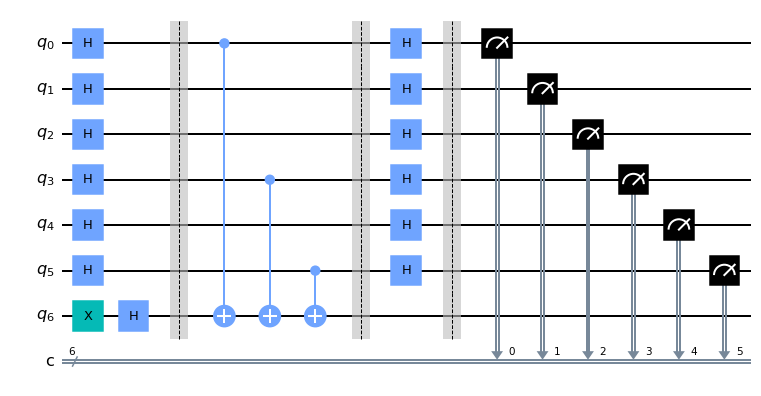

In [59]:
circuit.draw(output='mpl')

In [60]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend= simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}
